In [8]:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    #%matplotlib inline
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing   import StandardScaler
    from sklearn.linear_model import RANSACRegressor, LinearRegression
    
    cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
            'RAD','TAX','PTRATIO','B','LSTAT','MEDV']
    
    data = pd.read_csv(r"C:\PythonScripts\course-files2\housing.data",
                       sep=' +', engine='python', header=None, 
                       names=cols)
    
    X = data.loc[:, 'LSTAT'].values.reshape(-1,1)
    y = data['MEDV'].values

In [4]:
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
from sklearn.metrics import r2_score
r2_lr=r2_score(y_test, y_pred)
r2_lr

0.516079256264051

In [10]:
ransac=RANSACRegressor()
ransac.fit(X_train, y_train)
y_pred=ransac.predict(X_test)
r2_ransac=r2_score(y_test, y_pred)
r2_ransac

0.3590190448466659

In [18]:
the_best_r2=0
for tmp_treshold in range(10,40):
    tmp_ransac=RANSACRegressor(residual_threshold=tmp_treshold)
    tmp_ransac.fit(X_train, y_train)
    y_pred=ransac.predict(X_test)
    tmp_r2=r2_score(y_test, y_pred)
    if tmp_r2>the_best_r2:
        the_best_r2=tmp_r2
        ransac=tmp_ransac
the_best_r2

0.4994198908743519

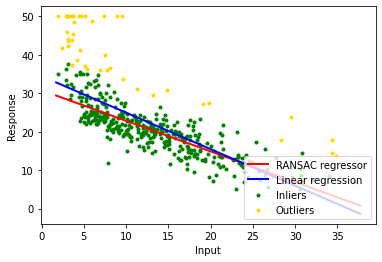

Ransac regression result: 0.4454963111764225
Linear regression result: 0.516079256264051


In [20]:
    line_X = np.arange(X.min(), X.max())[:, np.newaxis]
    line_y_ransac = ransac.predict(line_X)
    line_y_lr = lr.predict(line_X)
    
    plt.scatter(X_train[ransac.inlier_mask_], y_train[ransac.inlier_mask_], color='green', marker='.',
                label='Inliers')
    plt.scatter(X_train[~ransac.inlier_mask_], y_train[~ransac.inlier_mask_], color='gold', marker='.',
                label='Outliers')
    
    plt.plot(line_X, line_y_ransac, color='red', linewidth=2, label='RANSAC regressor')
    plt.plot(line_X, line_y_lr, color='blue', linewidth=2, label='Linear regression')
    
    plt.legend(loc='lower right')
    plt.xlabel("Input")
    plt.ylabel("Response")
    plt.show()
    
    r2_ransac = r2_score(y_test, ransac.predict(X_test))
    print("Ransac regression result: {}".format(r2_ransac))
    print("Linear regression result: {}".format(r2_lr))